# How can we do transfer learning?

**Background:**

The purpose of this notebook is to transform a .wav file into a spectrogram and then feed it into a well known model such as InceptionV3 for feature generation

## Libraries and File Locations

In [1]:
import sys
sys.path.append("..")

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import soundfile
from scipy import signal
import librosa
import matplotlib.pyplot as plt
import specdisplay

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/

/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/romulo/github/python_virtual_envs/soundflux/lib/python3.6/

## Define file generation parameters

**Number of Mel-frequencies to keep in the spectrograms**

In [3]:
n_mels = 128

## Defining spectrogram transformation function

## NOTE!!

We're averaging across channels, come back and try a different approach if that's not working

In [4]:
def extract_spectrogram(samples,sample_rate,n_mels=23,n_fft=2048):
    feature_set = []
    if samples.shape[1:]:
        channels = samples.shape[1:][0]
    else:
        channels = 1
        samples = np.expand_dims(samples, axis=1)
    for i in range(channels):
        sample_channel_x = samples[:,i]
        mel_spectrogram = librosa.feature.melspectrogram(y=sample_channel_x, 
                                                     sr=sample_rate,
                                                     n_fft=n_fft, 
                                                     n_mels = n_mels
                                                        )
        decibel_spec = librosa.logamplitude(mel_spectrogram,ref_power=np.max)
        feature_set.append(decibel_spec)
    feature_set = np.array(feature_set)
    feature_set = np.mean(feature_set,axis=0)
    return feature_set

# Creating the PNG spectrograms

In [5]:
urban_sounds_folder = "/media/romulo/6237-3231/urban_sound_challenge/"

In [6]:
metadata = pd.read_csv(urban_sounds_folder+'metadata/UrbanSound8K.csv')

CLASS gun_shot


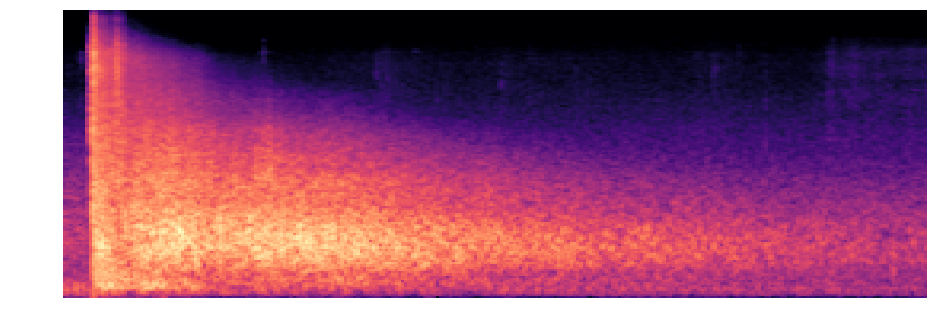

CLASS street_music


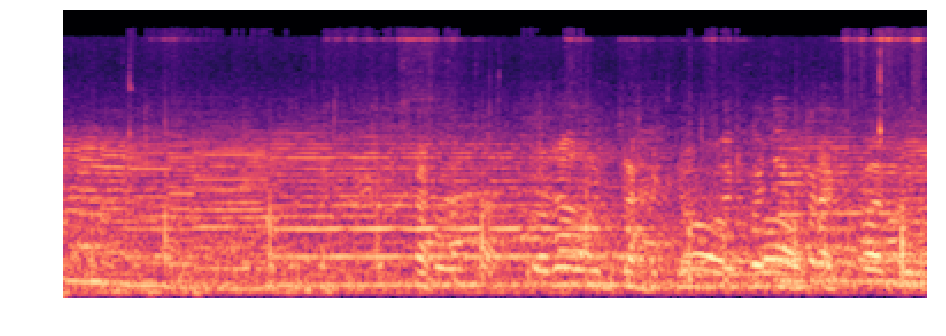

CLASS children_playing


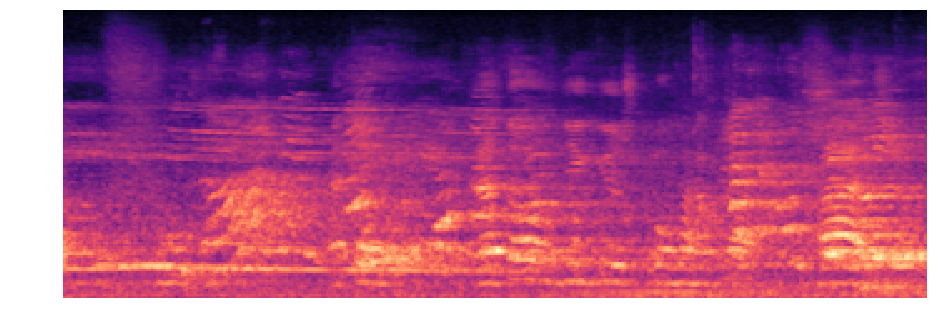

CLASS engine_idling


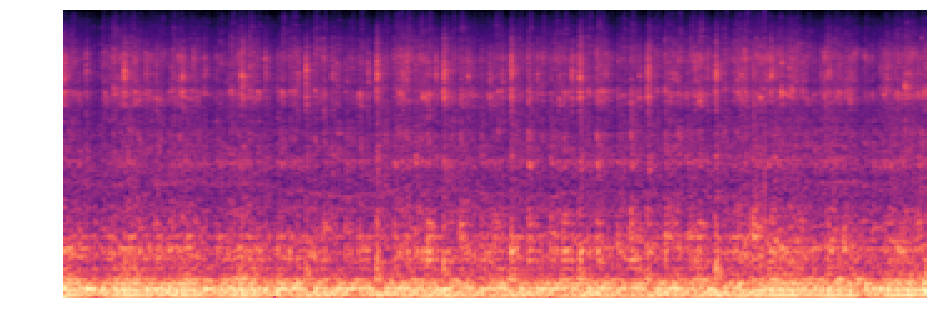

CLASS siren


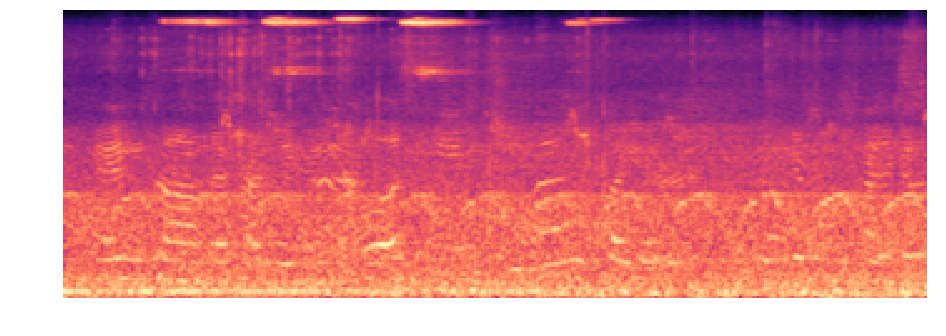

CLASS car_horn


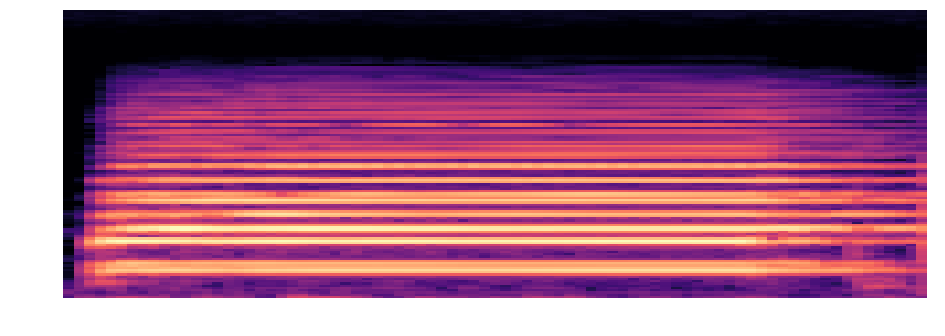

CLASS dog_bark


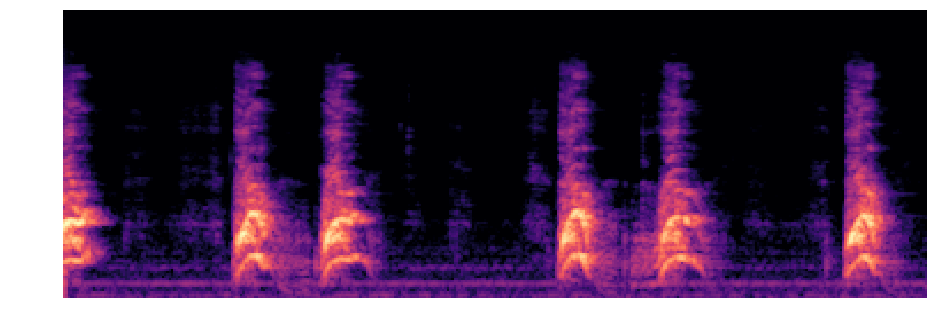

CLASS jackhammer


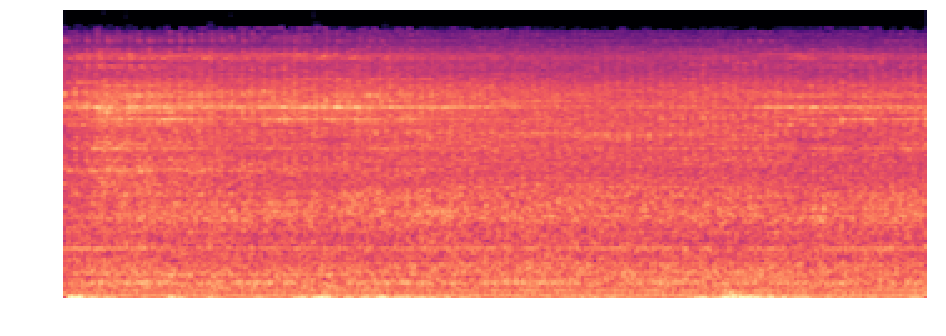

CLASS drilling


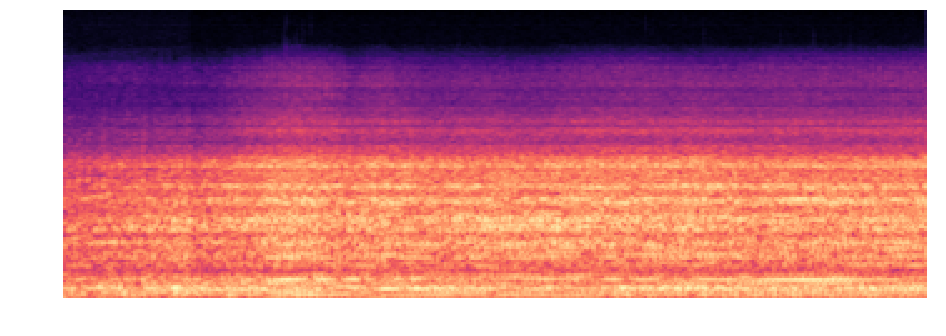

CLASS air_conditioner


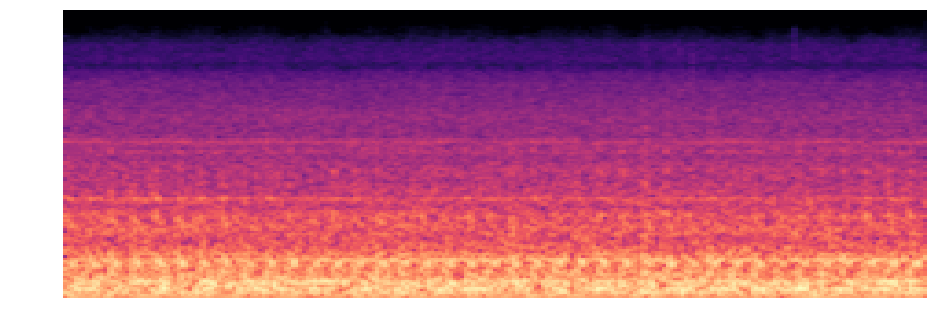

In [10]:
covered_class = {}
for index, row in metadata[1000::].iterrows():
    if covered_class.get(row['class']) == True:
        continue
    print('CLASS {}'.format(row['class']))
    # Convert to log scale (dB). We'll use the peak power as reference.
    y, sr = soundfile.read(urban_sounds_folder+"audio/fold" + str(row['fold'])+ "/" + str(row['slice_file_name']))
    log_s = extract_spectrogram(y,sr,n_mels=n_mels,n_fft=2048)
    #new plot
    fig = plt.figure(figsize=(12,4))
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)

    #getting spectrogram
    specdisplay.specshow(log_s, sr=sr, x_axis='time', y_axis='mel')

    #Saving PNG
    plt.show()
    covered_class[row['class']] = True
    if len(covered_class.keys()) ==10:
        break